In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
pd.options.display.max_columns = None # Shows all columns
import numpy as np
import json
import dill 
from IPython.display import display
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# ========================================
# READ/EXTRACT RELEVANT DATA
# ========================================
with open("data/Kickstarter_2018-10-18T03_20_48_880Z/Kickstarter_2018-10-18T03_20_48_880Z.json",
          encoding="utf8") as json_file:
    json_obj = [json.loads(line) for line in json_file]

In [3]:
# ---- QUICK EXPLORATION ----

In [4]:
type(json_obj)

list

In [5]:
len(json_obj)

205696

In [6]:
type(json_obj[0])

dict

In [7]:
len(json_obj[0])

4

In [8]:
json_obj[len(json_obj)-1] # look at final entry

{'table_id': 'Kickstarter',
 'robot_id': 'Kickstarter',
 'run_id': 'Kickstarter_2018-10-18T03_20_48_880Z',
 'data': {'id': 1991284368,
  'photo': {'key': 'assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png',
   'full': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463696010&auto=format&frame=1&q=92&s=02368a096ce01fc6cae29ab85df52d53',
   'ed': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463696010&auto=format&frame=1&q=92&s=7c87714e96670269be821591da0ddbb1',
   'med': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?ixlib=rb-1.1.0&crop=faces&w=272&h=153&fit=crop&v=1463696010&auto=format&frame=1&q=92&s=7ce6128059b609c7603ab19d113e7c55',
   'little': 'https://ksr-ugc.imgix.net/assets/011/796/998/9d7e9715ca5b8227f29de01f3c4abc8f_original.png?i

In [9]:
json_obj[0].keys()

dict_keys(['table_id', 'robot_id', 'run_id', 'data'])

In [10]:
# The useful keys are 'data'

In [11]:
# Extract relevant data
# pre-allocate
json_obj2 = []
# append 'data' dictionary only
for x in range(0, len(json_obj)):
    json_obj2.append(json_obj[x]["data"])

In [12]:
len(json_obj2) - len(json_obj) # Check that all rows extracted

0

In [13]:
json_obj2[0]

{'id': 895922629,
 'photo': {'key': 'assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg',
  'full': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=846b5db7dd4a36491881770969721fab',
  'ed': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=c2d76a75d1cd815488d3d3b651b49222',
  'med': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=272&h=153&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=f938afb8f27ea25f81b3f57bc8349d88',
  'little': 'https://ksr-ugc.imgix.net/assets/011/911/160/2ff8292ff8ad7486f38ea865a9c030bb_original.jpg?ixlib=rb-1.1.0&crop=faces&w=208&h=117&fit=crop&v=1463713991&auto=format&frame=1&q=92&s=69632b0cf7a30977d7eb58a05f3bd315',
 

In [14]:
# ---- EXTRACT RELEVANT COLUMNS ----
json_obj2[0].keys()

dict_keys(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'creator', 'location', 'category', 'profile', 'spotlight', 'urls', 'source_url'])

In [15]:
# Remove probably useless keys as well as nested-dictionary keys (to be added back later if desired): 
#   - Useless: photo, slug, urls, source_url
#   - Nested: creator, location, category, profile (to maybe be added later)
keys=('id', 'name', 'blurb', 'goal', 'pledged', 'state', 'disable_communication', 'country', 'currency', 'currency_symbol',
      'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable',
      'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type',
      'spotlight')

# pre-allocate
json_obj3 = []
# Append
for x in range(0, len(json_obj2)):
    json_obj3.append({k:json_obj2[x][k] for k in keys})

In [16]:
# ==== ADD BACK USEFUL SUB-DICTIONARY VALUES ====
# Previously removed: 'creator', 'location', 'category', 'profile'

In [17]:
# ---- Explore 'creator' ----

In [18]:
# Grab useful previously removed sub key-value pairs:
json_obj2[0]["creator"].keys()

dict_keys(['id', 'name', 'slug', 'is_registered', 'chosen_currency', 'avatar', 'urls'])

In [19]:
json_obj2[0]["creator"]

{'id': 69089661,
 'name': 'AJ Smith and Brandon Maier (deleted)',
 'slug': 'joziijobs',
 'is_registered': True,
 'chosen_currency': None,
 'avatar': {'thumb': 'https://ksr-ugc.imgix.net/missing_user_avatar.png?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=&auto=format&frame=1&q=92&s=c8baefb239621e7b5b26957577e078db',
  'small': 'https://ksr-ugc.imgix.net/missing_user_avatar.png?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=&auto=format&frame=1&q=92&s=fea4448b425bb704dead957d7448b9cc',
  'medium': 'https://ksr-ugc.imgix.net/missing_user_avatar.png?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=&auto=format&frame=1&q=92&s=fea4448b425bb704dead957d7448b9cc'},
 'urls': {'web': {'user': 'https://www.kickstarter.com/profile/joziijobs'},
  'api': {'user': 'https://api.kickstarter.com/v1/users/69089661?signature=1539920420.2da0e34dfcb087a277252ace8e292e04f47e953d'}}}

In [20]:
# Useful keys are: 'is_registered'

In [21]:
# Add 'is_registered' to json_obj3
for x in range(0, len(json_obj3)):
    json_obj3[x]["creator_registered"] = json_obj2[x]["creator"]["is_registered"]

In [22]:
# ---- Explore 'location' ----

In [23]:
json_obj2[0]["location"].keys()

dict_keys(['id', 'name', 'slug', 'short_name', 'displayable_name', 'localized_name', 'country', 'state', 'type', 'is_root', 'urls'])

In [24]:
json_obj2[0]["location"]

{'id': 12589342,
 'name': 'Manhattan',
 'slug': 'manhattan-ny',
 'short_name': 'Manhattan, NY',
 'displayable_name': 'Manhattan, NY',
 'localized_name': 'Manhattan',
 'country': 'US',
 'state': 'NY',
 'type': 'County',
 'is_root': False,
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/manhattan-ny',
   'location': 'https://www.kickstarter.com/locations/manhattan-ny'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1539904398.aae3553d1e62a16aac55da44ac8c71966f64bb86&woe_id=12589342'}}}

In [25]:
# Useful keys: country, state

In [26]:
for x in range(0, len(json_obj3)):
    # Extract country and state data
    if "location" in json_obj2[x]:
        json_obj3[x]["loc_country"] = json_obj2[x]["location"]["country"]
        json_obj3[x]["loc_state"] = json_obj2[x]["location"]["state"]
    
    # Add None when country/state data does not exist
    else:
        json_obj3[x]["loc_country"] = np.float64('nan')
        json_obj3[x]["loc_state"] = np.float64('nan')

In [27]:
# ---- Explore 'category' ----

In [28]:
# Grab useful previously removed sub key-value pairs:
json_obj2[0]["category"].keys()

dict_keys(['id', 'name', 'slug', 'position', 'parent_id', 'color', 'urls'])

In [29]:
json_obj2[0]["category"]

{'id': 342,
 'name': 'Web',
 'slug': 'technology/web',
 'position': 15,
 'parent_id': 16,
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/web'}}}

In [30]:
# Useful keys: name, slug, position, parent_id

In [31]:
# Check for null entries
x_category = 0
for x in range(0, len(json_obj2)):
    if "category" in json_obj2[x]:
        x_category = x_category + 1
    else:
        break
x_category - len(json_obj2)

0

In [32]:
json_obj2[0]["category"]

{'id': 342,
 'name': 'Web',
 'slug': 'technology/web',
 'position': 15,
 'parent_id': 16,
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/web'}}}

In [33]:
x_name = 0
for x in range(0, len(json_obj2)):
    if "name" in json_obj2[x]["category"]:
        x_name = x_name + 1
x_name - len(json_obj2)

0

In [34]:
x_slug = 0
for x in range(0, len(json_obj2)):
    if "slug" in json_obj2[x]["category"]:
        x_slug = x_slug + 1
x_slug - len(json_obj2)

0

In [35]:
x_position = 0
for x in range(0, len(json_obj2)):
    if "position" in json_obj2[x]["category"]:
        x_position = x_position + 1
x_position - len(json_obj2)

0

In [36]:
x_parent_id = 0
for x in range(0, len(json_obj2)):
    if "parent_id" in json_obj2[x]["category"]:
        x_parent_id = x_parent_id + 1
x_parent_id - len(json_obj2)

-17378

In [37]:
# NOTE: parent_id has 17378 null values!

In [38]:
for x in range(0, len(json_obj3)):
    # Extract name, slug, position, and parent_id data
    json_obj3[x]["category_name"] = json_obj2[x]["category"]["name"]
    json_obj3[x]["category_slug"] = json_obj2[x]["category"]["slug"]
    json_obj3[x]["category_position"] = json_obj2[x]["category"]["position"]
    if "parent_id" in json_obj2[x]["category"]:
        json_obj3[x]["category_parent_id"] = json_obj2[x]["category"]["parent_id"]
        
    # Add NaN when data does not exist
    else:
        json_obj3[x]["category_parent_id"] = np.float64('nan')

In [39]:
# ---- Explore 'profile' ----

In [40]:
# Grab useful previously removed sub key-value pairs:
json_obj2[0]["profile"].keys()

dict_keys(['id', 'project_id', 'state', 'state_changed_at', 'name', 'blurb', 'background_color', 'text_color', 'link_background_color', 'link_text_color', 'link_text', 'link_url', 'show_feature_image', 'background_image_opacity', 'should_show_feature_image_section', 'feature_image_attributes'])

In [41]:
json_obj2[56037]["profile"]

{'id': 1841891,
 'project_id': 1841891,
 'state': 'inactive',
 'state_changed_at': 1429068314,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/012/107/897/fa251d5986d6744d80e917ce8402ae0b_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463737460&auto=format&frame=1&q=92&s=3417203c5d3a4e034ffc31fa89c1c892',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/012/107/897/fa251d5986d6744d80e917ce8402ae0b_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463737460&auto=format&frame=1&q=92&s=ddce863a58a3fae73b17d0e6610a85a2'}}}

In [42]:
json_obj2[4]["profile"]["state"]

'active'

In [43]:
# check to see how many profile states are 'inactive'
x_inactive = 0
for x in range(0, len(json_obj2)):
    if json_obj2[x]["profile"]["state"] == 'inactive':
        x_inactive += 1
x_inactive

181513

In [44]:
# check to see how many profile states are 'active'
x_active = 0
for x in range(0, len(json_obj2)):
    if json_obj2[x]["profile"]["state"] == 'active':
        x_active += 1
x_active

24183

In [45]:
len(json_obj2) - x_active - x_inactive

0

In [46]:
# There are only two options for state: active and inactive - there are many inactive profile states

In [47]:
# Useful keys: none
# This is a bit of a guess. Most of the profile states are labeled as 'inactive'.
# My guess is that the profiles go latent once a projct is finished (perhaps regardless of whether it was successful or not)

In [48]:
# ---- CONVERT TO DATA FRAME ----

In [49]:
json_obj3[0]

{'id': 895922629,
 'name': 'Jozii-College Jobs Made Easy',
 'blurb': 'Jozii is the premier service for full-time university students to find paid part-time work and internships.',
 'goal': 3500,
 'pledged': 50,
 'state': 'failed',
 'disable_communication': False,
 'country': 'US',
 'currency': 'USD',
 'currency_symbol': '$',
 'currency_trailing_code': True,
 'deadline': 1417150740,
 'state_changed_at': 1417150742,
 'created_at': 1413476386,
 'launched_at': 1414525374,
 'staff_pick': False,
 'is_starrable': False,
 'backers_count': 1,
 'static_usd_rate': 1,
 'usd_pledged': '50.0',
 'converted_pledged_amount': 50,
 'fx_rate': 1,
 'current_currency': 'USD',
 'usd_type': 'international',
 'spotlight': False,
 'creator_registered': True,
 'loc_country': 'US',
 'loc_state': 'NY',
 'category_name': 'Web',
 'category_slug': 'technology/web',
 'category_position': 15,
 'category_parent_id': 16}

In [50]:
len(json_obj3)

205696

In [51]:
# Create initial (raw/dirty) dataframe
df00 = pd.DataFrame.from_records(json_obj3)

In [52]:
#df00.to_csv("data/df00.csv", sep=",")

In [53]:
# ========================================
# WORKING/VALIDATION SPLIT
# ========================================
df00.head(2)

,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type
0,1,Jozii is the premier service for full-time uni...,Web,16.0,15,technology/web,50,US,1413476386,True,USD,$,True,USD,1417150740,False,1.0,3500.0,895922629,False,1414525374,US,NY,Jozii-College Jobs Made Easy,50.00,False,False,failed,1417150742,1.0,50.0,international
1,63,Dropsy is an adventure game with a focus on ex...,Video Games,12.0,7,games/video games,1613,US,1317217452,True,USD,$,True,USD,1320259151,False,1.0,225.0,1190376005,False,1318876751,US,FL,DROPSY: A different take on the old school adv...,1613.47,True,True,successful,1320259153,1.0,1613.47,international


In [54]:
X, X_v, y, y_v = train_test_split(df00.drop(columns=['state']), 
                                  df00['state'], test_size=0.2, 
                                  random_state=101)

In [55]:
X.shape[0] / df00.shape[0] # Working X size

0.7999961107654013

In [56]:
X_v.shape[0] / df00.shape[0] # Validation X size

0.20000388923459864

In [57]:
y.shape[0] / df00.shape[0] # Working y size

0.7999961107654013

In [58]:
y_v.shape[0] / df00.shape[0] # Validation y size

0.20000388923459864

In [59]:
# Write out validation sets
#X_v.to_csv('data/X_v.csv', sep=",")

In [60]:
#y_v.to_csv('data/y_v.csv', sep=",")

In [61]:
X.head()

,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type
21932,241,In this speedy arcade multiplayer arena you do...,Video Games,12.0,7,games/video games,7550,AU,1383523737,True,AUD,$,True,USD,1404419631,False,0.713531,8000.0,178634548,False,1401827631,AU,ACT,BEARZERKERS - Subversive Indirect Multiplayer-...,8049.69,True,True,1404419631,0.927159,7463.340115803,international
39461,0,The first high tech integrated dairy farm in I...,Farms,10.0,7,food/farms,0,AU,1428747948,True,AUD,$,True,USD,1432854807,False,0.713203,3000000.0,205566306,False,1428966807,IN,Maharashtra,Unnati Manz Biotec Dairy Farms Pvt Ltd,0.00,False,False,1432854808,0.767936,0.0,international
143511,62,A storytelling game for three players that evo...,Tabletop Games,12.0,6,games/tabletop games,1900,US,1370896246,True,USD,$,True,USD,1379823650,False,1.000000,1000.0,2046843379,False,1377231650,US,OR,Out of the Blue - The Buddy Cop RPG,1900.00,True,False,1379823650,1.000000,1900.0,international
65630,75,“STICKS & STONES...and Stupid Jerks”\nHow 1 sh...,Children's Books,18.0,5,publishing/children's books,8135,US,1334175332,True,USD,$,True,USD,1337301846,False,1.000000,8000.0,756644238,False,1334709846,US,TN,Monkey Brains Books series launch of Book #1,8135.00,True,False,1337301846,1.000000,8135.0,international
109945,61,Emma se embarca huyendo del dolor por la muert...,Festivals,17.0,3,theater/festivals,4983,MX,1499310511,True,MXN,$,True,USD,1504926336,False,0.052969,85000.0,714374402,False,1499742336,MX,Distrito Federal,Gira de Quemar las naves. El viaje de Emma,87800.00,True,False,1504926337,0.055292,4854.657794,international


In [62]:
y.head()

21932     successful
39461         failed
143511    successful
65630     successful
109945    successful
Name: state, dtype: object

In [63]:
pd.concat([y,X], axis=1)

,state,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type
21932,successful,241,In this speedy arcade multiplayer arena you do...,Video Games,12.0,7,games/video games,7550,AU,1383523737,True,AUD,$,True,USD,1404419631,False,0.713531,8000.0,178634548,False,1401827631,AU,ACT,BEARZERKERS - Subversive Indirect Multiplayer-...,8049.69,True,True,1404419631,0.927159,7463.340115803,international
39461,failed,0,The first high tech integrated dairy farm in I...,Farms,10.0,7,food/farms,0,AU,1428747948,True,AUD,$,True,USD,1432854807,False,0.713203,3000000.0,205566306,False,1428966807,IN,Maharashtra,Unnati Manz Biotec Dairy Farms Pvt Ltd,0.00,False,False,1432854808,0.767936,0.0,international
143511,successful,62,A storytelling game for three players that evo...,Tabletop Games,12.0,6,games/tabletop games,1900,US,1370896246,True,USD,$,True,USD,1379823650,False,1.000000,1000.0,2046843379,False,1377231650,US,OR,Out of the Blue - The Buddy Cop RPG,1900.00,True,False,1379823650,1.000000,1900.0,international
65630,successful,75,“STICKS & STONES...and Stupid Jerks”\nHow 1 sh...,Children's Books,18.0,5,publishing/children's books,8135,US,1334175332,True,USD,$,True,USD,1337301846,False,1.000000,8000.0,756644238,False,1334709846,US,TN,Monkey Brains Books series launch of Book #1,8135.00,True,False,1337301846,1.000000,8135.0,international
109945,successful,61,Emma se embarca huyendo del dolor por la muert...,Festivals,17.0,3,theater/festivals,4983,MX,1499310511,True,MXN,$,True,USD,1504926336,False,0.052969,85000.0,714374402,False,1499742336,MX,Distrito Federal,Gira de Quemar las naves. El viaje de Emma,87800.00,True,False,1504926337,0.055292,4854.657794,international
129115,successful,555,"Life is awesome and life should be celebrated,...",Design,NaN,5,design,25178,US,1368474993,True,USD,$,True,USD,1374897540,False,1.000000,20000.0,1628137523,False,1372194905,US,NY,Trophy Buffet - Celebrate Something,25178.66,True,True,1374897542,1.000000,25178.66,international
38173,successful,23,“The Tortolita Twelve” is a unique and lyrical...,Shorts,11.0,16,film & video/shorts,1236,US,1309970143,True,USD,$,True,USD,1313625536,False,1.000000,1200.0,1191487471,False,1310169536,US,AZ,The Tortolita Twelve,1236.00,True,False,1313625536,1.000000,1236.0,international
196655,successful,42,Episode 3 of sci-fi anthology series SILENT EYE.,Science Fiction,11.0,15,film & video/science fiction,1801,GB,1535805232,True,GBP,£,False,USD,1537376266,False,1.309950,500.0,1248847804,False,1536166666,GB,England,Silent Eye Episode 3 - The Unlocking Thought,1370.00,True,False,1537376266,1.285983,1761.7972854,international
35815,successful,55,We have put together some of the finest snacks...,Small Batch,10.0,10,food/small batch,1910,US,1484415423,True,USD,$,True,USD,1487280242,False,1.000000,500.0,468390694,False,1484688242,US,WI,The Snack Shack,1910.00,True,False,1487280313,1.000000,1910.0,international
42761,failed,1,The Online Music Busker - Free legal music dow...,Web,16.0,15,technology/web,1,IE,1414968637,True,EUR,€,False,USD,1420235632,False,1.156109,1250.0,315593760,False,1415051632,IE,Dublin,The Online Busker - Legal Music Downloads,1.00,False,False,1420235632,1.252477,1.25247677,international


In [64]:
# Create working dataframe
df = pd.concat([y,X], axis=1).reset_index(drop=True)
df.head()

,state,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type
0,successful,241,In this speedy arcade multiplayer arena you do...,Video Games,12.0,7,games/video games,7550,AU,1383523737,True,AUD,$,True,USD,1404419631,False,0.713531,8000.0,178634548,False,1401827631,AU,ACT,BEARZERKERS - Subversive Indirect Multiplayer-...,8049.69,True,True,1404419631,0.927159,7463.340115803,international
1,failed,0,The first high tech integrated dairy farm in I...,Farms,10.0,7,food/farms,0,AU,1428747948,True,AUD,$,True,USD,1432854807,False,0.713203,3000000.0,205566306,False,1428966807,IN,Maharashtra,Unnati Manz Biotec Dairy Farms Pvt Ltd,0.00,False,False,1432854808,0.767936,0.0,international
2,successful,62,A storytelling game for three players that evo...,Tabletop Games,12.0,6,games/tabletop games,1900,US,1370896246,True,USD,$,True,USD,1379823650,False,1.000000,1000.0,2046843379,False,1377231650,US,OR,Out of the Blue - The Buddy Cop RPG,1900.00,True,False,1379823650,1.000000,1900.0,international
3,successful,75,“STICKS & STONES...and Stupid Jerks”\nHow 1 sh...,Children's Books,18.0,5,publishing/children's books,8135,US,1334175332,True,USD,$,True,USD,1337301846,False,1.000000,8000.0,756644238,False,1334709846,US,TN,Monkey Brains Books series launch of Book #1,8135.00,True,False,1337301846,1.000000,8135.0,international
4,successful,61,Emma se embarca huyendo del dolor por la muert...,Festivals,17.0,3,theater/festivals,4983,MX,1499310511,True,MXN,$,True,USD,1504926336,False,0.052969,85000.0,714374402,False,1499742336,MX,Distrito Federal,Gira de Quemar las naves. El viaje de Emma,87800.00,True,False,1504926337,0.055292,4854.657794,international


In [65]:
df.shape

(164556, 32)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164556 entries, 0 to 164555
Data columns (total 32 columns):
state                       164556 non-null object
backers_count               164556 non-null int64
blurb                       164556 non-null object
category_name               164556 non-null object
category_parent_id          150671 non-null float64
category_position           164556 non-null int64
category_slug               164556 non-null object
converted_pledged_amount    164556 non-null int64
country                     164556 non-null object
created_at                  164556 non-null int64
creator_registered          164556 non-null bool
currency                    164556 non-null object
currency_symbol             164556 non-null object
currency_trailing_code      164556 non-null bool
current_currency            164556 non-null object
deadline                    164556 non-null int64
disable_communication       164556 non-null bool
fx_rate                     1645

In [67]:
# ========================================
# CLEAN DATA
# ========================================

In [68]:
# ---- REARRANGE COLUMNS ----
df.columns

Index(['state', 'backers_count', 'blurb', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'converted_pledged_amount', 'country', 'created_at',
       'creator_registered', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'loc_country', 'loc_state', 'name', 'pledged',
       'spotlight', 'staff_pick', 'state_changed_at', 'static_usd_rate',
       'usd_pledged', 'usd_type'],
      dtype='object')

In [69]:
json_obj3[0].keys()

dict_keys(['id', 'name', 'blurb', 'goal', 'pledged', 'state', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'spotlight', 'creator_registered', 'loc_country', 'loc_state', 'category_name', 'category_slug', 'category_position', 'category_parent_id'])

In [70]:
# The df keys got rearranged into alphabetical order.

In [71]:
# Re-order columns
df = df[['state', 'id', 'name', 'blurb', 'category_name', 'category_slug', 'category_position', 'category_parent_id', 'goal', 'pledged', 
         'disable_communication', 'loc_country', 'loc_state', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 
         'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'is_starrable', 'backers_count', 'static_usd_rate', 
         'usd_pledged', 'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type', 'spotlight', 
         'creator_registered']]

In [72]:
len(df.columns)

32

In [73]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'category_name', 'category_slug',
       'category_position', 'category_parent_id', 'goal', 'pledged',
       'disable_communication', 'loc_country', 'loc_state', 'country',
       'currency', 'currency_symbol', 'currency_trailing_code', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'is_starrable', 'backers_count', 'static_usd_rate', 'usd_pledged',
       'converted_pledged_amount', 'fx_rate', 'current_currency', 'usd_type',
       'spotlight', 'creator_registered'],
      dtype='object')

In [74]:
# ---- REMOVE DUPLICATES ----

In [75]:
df.sort_values(by=["backers_count"],ascending=False)[["id","name","backers_count"]]

,id,name,backers_count
27841,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",105857
105376,1755266685,The Veronica Mars Movie Project,91585
7569,1929840910,Double Fine Adventure,87142
92440,1929840910,Double Fine Adventure,87142
114718,286165030,Torment: Tides of Numenera,74405
13394,286165030,Torment: Tides of Numenera,74405
114339,458565935,Project Eternity,73986
157984,458565935,Project Eternity,73986
2127,947809001,Shenmue 3,69320
90201,506924864,Pebble: E-Paper Watch for iPhone and Android,68929


In [76]:
df.drop_duplicates(inplace=True)

In [77]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-1393

In [78]:
# Explore the duplicate ID rows
#pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

In [79]:
# It looks like some of the rows look different due to usd_pledged, converted_pledged_amount, fx_rate (which appears to be 
# exchange rate), and current_currency. Let's just delete the following currency-related columns:
# currency_symbol, static_usd_rate, convertd_pledged_amount, fx_rate, current_currency, usd_type
df.drop(columns=['currency_symbol','static_usd_rate','converted_pledged_amount','fx_rate','current_currency','usd_type'], 
        inplace=True)

In [80]:
df.drop_duplicates(inplace=True)

In [81]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-193

In [82]:
pd.options.display.max_columns = None

In [83]:
df

,state,id,name,blurb,category_name,category_slug,category_position,category_parent_id,goal,pledged,disable_communication,loc_country,loc_state,country,currency,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,usd_pledged,spotlight,creator_registered
0,successful,178634548,BEARZERKERS - Subversive Indirect Multiplayer-...,In this speedy arcade multiplayer arena you do...,Video Games,games/video games,7,12.0,8000.0,8049.69,False,AU,ACT,AU,AUD,True,1404419631,1404419631,1383523737,1401827631,True,False,241,7463.340115803,True,True
1,failed,205566306,Unnati Manz Biotec Dairy Farms Pvt Ltd,The first high tech integrated dairy farm in I...,Farms,food/farms,7,10.0,3000000.0,0.00,False,IN,Maharashtra,AU,AUD,True,1432854807,1432854808,1428747948,1428966807,False,False,0,0.0,False,True
2,successful,2046843379,Out of the Blue - The Buddy Cop RPG,A storytelling game for three players that evo...,Tabletop Games,games/tabletop games,6,12.0,1000.0,1900.00,False,US,OR,US,USD,True,1379823650,1379823650,1370896246,1377231650,False,False,62,1900.0,True,True
3,successful,756644238,Monkey Brains Books series launch of Book #1,“STICKS & STONES...and Stupid Jerks”\nHow 1 sh...,Children's Books,publishing/children's books,5,18.0,8000.0,8135.00,False,US,TN,US,USD,True,1337301846,1337301846,1334175332,1334709846,False,False,75,8135.0,True,True
4,successful,714374402,Gira de Quemar las naves. El viaje de Emma,Emma se embarca huyendo del dolor por la muert...,Festivals,theater/festivals,3,17.0,85000.0,87800.00,False,MX,Distrito Federal,MX,MXN,True,1504926336,1504926337,1499310511,1499742336,False,False,61,4854.657794,True,True
5,successful,1628137523,Trophy Buffet - Celebrate Something,"Life is awesome and life should be celebrated,...",Design,design,5,NaN,20000.0,25178.66,False,US,NY,US,USD,True,1374897540,1374897542,1368474993,1372194905,True,False,555,25178.66,True,True
6,successful,1191487471,The Tortolita Twelve,“The Tortolita Twelve” is a unique and lyrical...,Shorts,film & video/shorts,16,11.0,1200.0,1236.00,False,US,AZ,US,USD,True,1313625536,1313625536,1309970143,1310169536,False,False,23,1236.0,True,True
7,successful,1248847804,Silent Eye Episode 3 - The Unlocking Thought,Episode 3 of sci-fi anthology series SILENT EYE.,Science Fiction,film & video/science fiction,15,11.0,500.0,1370.00,False,GB,England,GB,GBP,False,1537376266,1537376266,1535805232,1536166666,False,False,42,1761.7972854,True,True
8,successful,468390694,The Snack Shack,We have put together some of the finest snacks...,Small Batch,food/small batch,10,10.0,500.0,1910.00,False,US,WI,US,USD,True,1487280242,1487280313,1484415423,1484688242,False,False,55,1910.0,True,True
9,failed,315593760,The Online Busker - Legal Music Downloads,The Online Music Busker - Free legal music dow...,Web,technology/web,15,16.0,1250.0,1.00,False,IE,Dublin,IE,EUR,False,1420235632,1420235632,1414968637,1415051632,False,False,1,1.25247677,False,True


In [84]:
# It looks like there are differences with pledged, backers_count and usd_pledged

In [85]:
# usd_pledged is redundant with pledged - remove usd_pledged
df.drop(columns=['usd_pledged'], inplace=True)

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-180

In [88]:
# is_starrable is unclear and seems to be a problem with duplicates. Let's drop it
df.drop(columns=['is_starrable'], inplace=True)

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-179

In [91]:
# Still differences between pledged and backers_count. Without some sort of a time stamp we don't know which one is the most
# updated row. Let's look for duplicate IDs, then keep the rows with the largest pledge values

In [92]:
df = df.sort_values('pledged', ascending=False).drop_duplicates('id').sort_index()

In [93]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

0

In [94]:
# No more duplicates!

In [95]:
df.shape

(152584, 24)

In [96]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'category_name', 'category_slug',
       'category_position', 'category_parent_id', 'goal', 'pledged',
       'disable_communication', 'loc_country', 'loc_state', 'country',
       'currency', 'currency_trailing_code', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count', 'spotlight',
       'creator_registered'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152584 entries, 0 to 164555
Data columns (total 24 columns):
state                     152584 non-null object
id                        152584 non-null int64
name                      152584 non-null object
blurb                     152584 non-null object
category_name             152584 non-null object
category_slug             152584 non-null object
category_position         152584 non-null int64
category_parent_id        138699 non-null float64
goal                      152584 non-null float64
pledged                   152584 non-null float64
disable_communication     152584 non-null bool
loc_country               151819 non-null object
loc_state                 151783 non-null object
country                   152584 non-null object
currency                  152584 non-null object
currency_trailing_code    152584 non-null bool
deadline                  152584 non-null int64
state_changed_at          152584 non-null int64
created_at  

In [98]:
# Re-index
df.reset_index(drop=True, inplace=True)

In [99]:
df.shape

(152584, 24)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 24 columns):
state                     152584 non-null object
id                        152584 non-null int64
name                      152584 non-null object
blurb                     152584 non-null object
category_name             152584 non-null object
category_slug             152584 non-null object
category_position         152584 non-null int64
category_parent_id        138699 non-null float64
goal                      152584 non-null float64
pledged                   152584 non-null float64
disable_communication     152584 non-null bool
loc_country               151819 non-null object
loc_state                 151783 non-null object
country                   152584 non-null object
currency                  152584 non-null object
currency_trailing_code    152584 non-null bool
deadline                  152584 non-null int64
state_changed_at          152584 non-null int64
created_at  

In [101]:
# ---- FURTHER REFINE VARIABLES ----

In [102]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'category_name', 'category_slug',
       'category_position', 'category_parent_id', 'goal', 'pledged',
       'disable_communication', 'loc_country', 'loc_state', 'country',
       'currency', 'currency_trailing_code', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count', 'spotlight',
       'creator_registered'],
      dtype='object')

# variable notes

## delete
* name - delete
* blurb - delete
* loc_state - delete (too granular)
* country - delete (not sure how it differs from loc_country; largely redundant)
* currency - delete (pledges is in usd)
* currency_trailing_code - delete (what is it?)
* state_changed_at - delete

## keep
* id - keep (primary key)
* category_name - keep; change to sub_category
* category slug - keep; extract first word; change to category
* category_position - keep; change to sub_category_id; move before sub_category
* category_parent_id - keep; change to category_id; move before category
* goal - keep
* pledged - keep
* disable_communication - keep (but what is it??)
* loc_country - keep (where the project is launche from); rename as country
* deadline - keep; convert to datetime
* created_at - keep; convert to datetime
* launched_at - keep; convert to datetime
* staff_pick - keep
* backers_count - keep; move before pledged
* spotlight - keep (but what is it?)
* creator_registered - keep
* state - keep

In [103]:
df.drop(columns=['name','blurb','loc_state','country','currency','currency_trailing_code','state_changed_at'], inplace=True)

In [104]:
len(df.columns)

17

In [105]:
# Rename columns
df.rename(columns={'category_name':'sub_category', 'category_slug':'category', 'category_position':'sub_category_id', 
                  'category_parent_id':'category_id', 'loc_country':'country', 'state':'launch_state'}, inplace=True)

In [106]:
df.columns

Index(['launch_state', 'id', 'sub_category', 'category', 'sub_category_id',
       'category_id', 'goal', 'pledged', 'disable_communication', 'country',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'backers_count',
       'spotlight', 'creator_registered'],
      dtype='object')

In [107]:
# Re-arrange columns
df = df[['launch_state', 'id', 'sub_category_id', 'sub_category', 'category_id', 'category', 'goal', 'backers_count', 'pledged', 
         'disable_communication', 'country','deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight', 
         'creator_registered']]

In [108]:
df.columns

Index(['launch_state', 'id', 'sub_category_id', 'sub_category', 'category_id',
       'category', 'goal', 'backers_count', 'pledged', 'disable_communication',
       'country', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'creator_registered'],
      dtype='object')

In [109]:
df.sort_values(by=['category_id','sub_category_id'])

,launch_state,id,sub_category_id,sub_category,category_id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered
30,failed,1695401988,1,Ceramics,1.0,art/ceramics,18000.0,2,4.00,False,US,1475439831,1472736829,1473279831,False,False,True
1734,failed,1813064714,1,Ceramics,1.0,art/ceramics,5000.0,0,0.00,False,US,1465714959,1463108384,1463122959,False,False,True
2473,canceled,151822590,1,Ceramics,1.0,art/ceramics,10000.0,0,0.00,False,US,1457434952,1454077572,1454151752,False,False,True
3140,successful,1535035023,1,Ceramics,1.0,art/ceramics,5600.0,97,7626.00,False,AU,1434028356,1431379501,1432213956,False,True,True
3787,failed,1766428087,1,Ceramics,1.0,art/ceramics,2000.0,14,786.00,False,US,1529380357,1524686915,1526788357,False,False,True
4088,failed,1587789064,1,Ceramics,1.0,art/ceramics,2200.0,2,60.00,False,US,1441637214,1438905645,1439045214,False,False,True
4381,failed,568017695,1,Ceramics,1.0,art/ceramics,1000.0,0,0.00,False,US,1430868827,1427481514,1428276827,False,False,True
4426,failed,1819888773,1,Ceramics,1.0,art/ceramics,7000.0,7,386.00,False,US,1414127040,1409461461,1410556405,False,False,True
5083,successful,2090726875,1,Ceramics,1.0,art/ceramics,650.0,8,675.00,False,US,1452401940,1449199690,1449511803,False,True,True
5147,successful,1770710342,1,Ceramics,1.0,art/ceramics,550.0,23,653.00,False,US,1436569200,1433790413,1434465813,False,True,True


In [110]:
len(df.sub_category_id.unique())

19

In [111]:
len(df.sub_category.unique())

159

In [112]:
len(df.category_id.unique())

16

In [113]:
len(df.category.unique())

169

In [114]:
# The number of category IDs does not match the category titles (same for sub-).

In [115]:
df.sort_values(by='sub_category_id').sub_category_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [116]:
df[df.sub_category_id == 1].sub_category.unique()

array(['Animals', 'Candles', 'Ceramics', 'Gaming Hardware', 'Accessories',
       'Performances', 'Audio', 'Architecture', 'Anthologies', 'Comedy',
       'Action', '3D Printing', 'Academic', 'Blues', 'Art', 'Bacon'],
      dtype=object)

In [117]:
df[df.sub_category_id == 2].sub_category.unique()

array(['Comics', 'Animation', 'Comic Books', 'Apparel', 'Conceptual Art',
       'Anthologies', 'Experimental', 'Apps', 'Live Games',
       'Civic Design', 'Crochet', 'Fine Art', 'Chiptune', 'Photo',
       'Residencies', 'Community Gardens'], dtype=object)

In [118]:
df[df.sub_category_id == 3].sub_category.unique()

array(['Festivals', 'Digital Art', 'Graphic Design', 'Comedy', 'Print',
       'Crafts', 'Classical Music', 'Mobile Games', 'Art Books', 'DIY',
       'Camera Equipment', 'Nature', 'Spaces', 'Cookbooks',
       'Childrenswear', 'Events'], dtype=object)

In [119]:
# there does not seem to be a strong correlation between sub_category_id and sub_category. Let's drop the sub_category_id 
# and (maybe) keep sub_category

In [120]:
df.sort_values(by='category_id').category_id.unique()

array([ 1.,  3.,  6.,  7.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 26., nan])

In [121]:
df[df.category_id == 1].category.unique()

array(['art/digital art', 'art/public art', 'art/ceramics',
       'art/painting', 'art/performance art', 'art/conceptual art',
       'art/installations', 'art/mixed media', 'art/illustration',
       'art/sculpture', 'art/textiles', 'art/video art'], dtype=object)

In [122]:
df[df.category_id == 3].category.unique()

array(['comics/webcomics', 'comics/comic books', 'comics/graphic novels',
       'comics/anthologies', 'comics/events'], dtype=object)

In [123]:
df[df.category_id == 6].category.unique()

array(['dance/performances', 'dance/spaces', 'dance/residencies',
       'dance/workshops'], dtype=object)

In [124]:
df[np.isnan(df.category_id)].category.unique()

array(['design', 'comics', 'journalism', 'fashion', 'crafts', 'dance',
       'film & video', 'theater', 'food', 'music', 'photography',
       'technology', 'art', 'games', 'publishing'], dtype=object)

In [125]:
df.sort_values('sub_category').sub_category.unique()

array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
       'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
       'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
       'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
       'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
       'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
       'Digital Art', 'Documentary', 'Drama', 'Drinks',
       'Electronic Music', 'Embroidery', 'Events', 'Experimental',
       'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
       "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
       'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
       'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
       'Graphic Design', 'Graphic Novels', 'Hardware', 'Hip-Ho

In [126]:
df.sort_values('category').category.unique()

array(['art', 'art/ceramics', 'art/conceptual art', 'art/digital art',
       'art/illustration', 'art/installations', 'art/mixed media',
       'art/painting', 'art/performance art', 'art/public art',
       'art/sculpture', 'art/textiles', 'art/video art', 'comics',
       'comics/anthologies', 'comics/comic books', 'comics/events',
       'comics/graphic novels', 'comics/webcomics', 'crafts',
       'crafts/candles', 'crafts/crochet', 'crafts/diy',
       'crafts/embroidery', 'crafts/glass', 'crafts/knitting',
       'crafts/pottery', 'crafts/printing', 'crafts/quilts',
       'crafts/stationery', 'crafts/taxidermy', 'crafts/weaving',
       'crafts/woodworking', 'dance', 'dance/performances',
       'dance/residencies', 'dance/spaces', 'dance/workshops', 'design',
       'design/architecture', 'design/civic design',
       'design/graphic design', 'design/interactive design',
       'design/product design', 'design/typography', 'fashion',
       'fashion/accessories', 'fashion/appa

# CATEGORY NOTES

So, what do we keep? It doesn't make much sense to keep sub-categories without the parent category. And for now, dealing with so many categories to begin with it might become overwhelming trying to manage sub-categories too. Let's start with just categories and see if we can make some good predictions (and remember that we can always beef up the algorithm later by adding in the sub-category variables).

As for the category variables, do we want to extract the parent category (eg 'technology') or do we want to keep the sub-categories tacked on (eg 'technology/3d printing' and 'technology/apps')? For now, as mentioned above, let's drop the sub-categories (eg 'technology/3d printing' and 'technology/apps' are both just considered 'technology'). 

We now have two choices: keep the category as categorical or use the IDs. For context, let's keep the categories as categorical and use dummy variables later as needed.

In [127]:
df.columns

Index(['launch_state', 'id', 'sub_category_id', 'sub_category', 'category_id',
       'category', 'goal', 'backers_count', 'pledged', 'disable_communication',
       'country', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'creator_registered'],
      dtype='object')

In [128]:
df.drop(columns=['sub_category_id','sub_category','category_id'], inplace=True)

In [129]:
len(df.columns)

14

In [130]:
df.category[24:28]

24         film & video/animation
25                         comics
26            film & video/horror
27    publishing/radio & podcasts
Name: category, dtype: object

In [131]:
[i.split('/')[0] for i in df.category][24:28]

['film & video', 'comics', 'film & video', 'publishing']

In [132]:
df.category = [i.split('/')[0] for i in df.category]

In [133]:
df.sort_values(by='category').category.unique()

array(['art', 'comics', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music',
       'photography', 'publishing', 'technology', 'theater'], dtype=object)

In [134]:
len(df.category.unique())

15

In [135]:
# We are left with 15 categories.
df.columns

Index(['launch_state', 'id', 'category', 'goal', 'backers_count', 'pledged',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_registered'],
      dtype='object')

In [136]:
df.head()

,launch_state,id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered
0,successful,178634548,games,8000.0,241,8049.69,False,AU,1404419631,1383523737,1401827631,True,True,True
1,failed,205566306,food,3000000.0,0,0.00,False,IN,1432854807,1428747948,1428966807,False,False,True
2,successful,2046843379,games,1000.0,62,1900.00,False,US,1379823650,1370896246,1377231650,False,True,True
3,successful,756644238,publishing,8000.0,75,8135.00,False,US,1337301846,1334175332,1334709846,False,True,True
4,successful,714374402,theater,85000.0,61,87800.00,False,MX,1504926336,1499310511,1499742336,False,True,True


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 14 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
disable_communication    152584 non-null bool
country                  151819 non-null object
deadline                 152584 non-null int64
created_at               152584 non-null int64
launched_at              152584 non-null int64
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_registered       152584 non-null bool
dtypes: bool(4), float64(2), int64(5), object(3)
memory usage: 12.2+ MB


In [138]:
df.deadline[0]

1404419631

In [139]:
# Convert relevant values to datetime 
# The default format of these values is in unix time format
df['deadline'] = df['deadline'].apply(datetime.utcfromtimestamp)
df['created_at'] = df['created_at'].apply(datetime.utcfromtimestamp)
df['launched_at'] = df['launched_at'].apply(datetime.utcfromtimestamp)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 14 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
disable_communication    152584 non-null bool
country                  151819 non-null object
deadline                 152584 non-null datetime64[ns]
created_at               152584 non-null datetime64[ns]
launched_at              152584 non-null datetime64[ns]
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_registered       152584 non-null bool
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 12.2+ MB


In [141]:
df.head()

,launch_state,id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered
0,successful,178634548,games,8000.0,241,8049.69,False,AU,2014-07-03 20:33:51,2013-11-04 00:08:57,2014-06-03 20:33:51,True,True,True
1,failed,205566306,food,3000000.0,0,0.00,False,IN,2015-05-28 23:13:27,2015-04-11 10:25:48,2015-04-13 23:13:27,False,False,True
2,successful,2046843379,games,1000.0,62,1900.00,False,US,2013-09-22 04:20:50,2013-06-10 20:30:46,2013-08-23 04:20:50,False,True,True
3,successful,756644238,publishing,8000.0,75,8135.00,False,US,2012-05-18 00:44:06,2012-04-11 20:15:32,2012-04-18 00:44:06,False,True,True
4,successful,714374402,theater,85000.0,61,87800.00,False,MX,2017-09-09 03:05:36,2017-07-06 03:08:31,2017-07-11 03:05:36,False,True,True


In [142]:
# ---- NA IMPUTATION ----

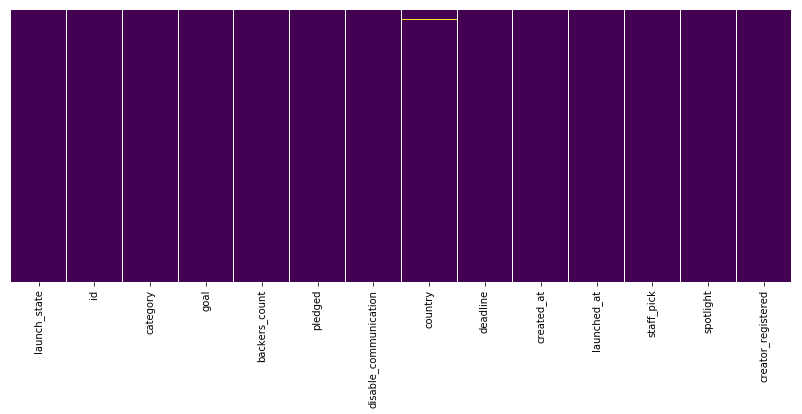

In [143]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [144]:
# So few null values that they don't even show up
df.isnull().sum(axis=0)

launch_state               0
id                         0
category                   0
goal                       0
backers_count              0
pledged                    0
disable_communication      0
country                  765
deadline                   0
created_at                 0
launched_at                0
staff_pick                 0
spotlight                  0
creator_registered         0
dtype: int64

In [145]:
# There are only 876 null values, all of which are in the 'country' column. 

In [146]:
# Retrieve list of project IDs that have country=NaN
df[df["country"].isnull().values]["id"].values

array([ 801838419,     727286, 1306924213,  608718360,  875945572,
       1688802720, 1081313636,  850902006, 1307622956,  725798626,
        440068954,   28409399, 1320750243,  919078405, 1836746134,
       1488339687,  209496650, 1931539552, 1691823665, 1262537805,
       1177459197, 1696542556, 2135944944,  117371392,   35471729,
       1026184808, 1326265792,  761676541,  282089287, 1390281946,
        939413512,  466634876,  708062604,  948727245,  538435515,
        861868065, 1878797082,  322319047, 1934491389,  178359628,
        999071125, 1165557984,   76407781, 1660289397,  419264972,
       1972950716,  396359626, 1729765076,  191972022, 2096069537,
        136443064,  453774435, 1813309152, 1142501949,  577470777,
       1950525148, 1405745919, 1078344643, 1415940511, 1444737576,
        127647132, 1760274789, 1698812876, 1700059981, 1349847076,
       1774586665,  999986353, 1418124155, 1891802431,  181501016,
        783526904,  688266038,  399271819, 2017224179, 1680804

In [147]:
df00[df00['id'].isin(df[df["country"].isnull().values]["id"].values)].sort_values(by='id').drop_duplicates('id')

,backers_count,blurb,category_name,category_parent_id,category_position,category_slug,converted_pledged_amount,country,created_at,creator_registered,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,loc_country,loc_state,name,pledged,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type
93876,25,This is a project to create a free iPhone app ...,Software,16.0,11,technology/software,145,US,1240637870,True,USD,$,True,USD,1247554799,False,1.0,99.00,727286,False,1240673781,NaN,NaN,Offline Wikipedia iPhone app,145.00,True,True,successful,1247554830,1.0,145.0,international
140467,90,Dream with Me--A documentary that will change ...,Documentary,11.0,4,film & video/documentary,5615,US,1252976897,True,USD,$,True,USD,1255655280,False,1.0,5000.00,2442649,False,1252986806,NaN,NaN,Dream with Me--A documentary about one year in...,5615.00,True,True,successful,1255655706,1.0,5615.0,international
185101,30,Three women fresh out of college explore outsi...,Art,NaN,1,art,1999,US,1273868958,True,USD,$,True,USD,1278625140,False,1.0,2000.00,4732285,False,1274912793,NaN,NaN,Insiders/Out: Exploring Outsider Art in America,1999.66,True,False,successful,1278634203,1.0,1999.66,international
11597,15,Strange Positioning Systems (SPS) is a global ...,Performance Art,1.0,8,art/performance art,695,US,1276205826,True,USD,$,True,USD,1282340220,False,1.0,8500.00,4948516,False,1278695304,NaN,NaN,STRANGE POSITIONING SYSTEMS (SPS) - A global l...,695.00,False,False,failed,1282340707,1.0,695.0,international
171886,0,Ghosts can be scary. Some people are afraid of...,Hardware,16.0,8,technology/hardware,0,US,1271124267,True,USD,$,True,USD,1276142400,False,1.0,5000.00,5033146,False,1271130703,NaN,NaN,Paranormal Equipment Drive,0.00,False,False,failed,1276142415,1.0,0.0,international
102476,4,Singer/songwriter wants you to be a part of he...,Pop,14.0,14,music/pop,95,US,1281774989,True,USD,$,True,USD,1286959989,False,1.0,5500.00,5435797,False,1281775989,NaN,NaN,Creating A Kaleidoscope Of Music For You!,95.00,False,False,failed,1286960409,1.0,95.0,international
65312,79,“Not till we are completely lost or turned ro...,Narrative Film,11.0,13,film & video/narrative film,16221,US,1280889137,True,USD,$,True,USD,1283324340,False,1.0,15000.00,10684812,False,1280902200,NaN,NaN,SLEW HAMPSHIRE: A Tapestry of Transcendental ...,16221.55,True,False,successful,1283324433,1.0,16221.55,international
73269,14,I desire to capture the culture of food throug...,Food,NaN,8,food,1438,US,1275515661,True,USD,$,True,USD,1280491200,False,1.0,1000.00,12076273,False,1277505145,NaN,NaN,The Audio Embodiment of the Culture of Food,1438.00,True,False,successful,1280491206,1.0,1438.0,international
72749,2,"As the cooler winter season approaches, immigr...",Journalism,NaN,10,journalism,15,US,1283266207,True,USD,$,True,USD,1285860225,False,1.0,1700.00,17279344,False,1283268225,NaN,NaN,Photographing immigration activists on the Ari...,15.00,False,False,failed,1285860611,1.0,15.0,international
117247,92,"The storyline of ""It's Always Greener"" is: Gir...",Webseries,11.0,19,film & video/webseries,5630,US,1278456657,True,USD,$,True,USD,1282967940,False,1.0,5000.00,19191290,False,1280186884,NaN,NaN,"""IT'S ALWAYS GREENER""-- a fresh, new web sitcom!",5630.00,True,False,successful,1282968035,1.0,5630.0,international


In [148]:
df00[df00['id'].isin(df[df["country"].isnull().values]["id"].values)].sort_values(by='id').drop_duplicates('id')["country"].unique()

array(['US'], dtype=object)

In [149]:
# All of the NaN values in the country column of df are shown to be from the US! (Recall that we previously deleted the
# 'country' column and kept the 'loc_country' column while re-naming it to 'country')

In [150]:
df['country'].fillna('US', inplace=True)

In [151]:
sum(df.isnull().sum(axis=0))

0

In [152]:
df.shape

(152584, 14)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 14 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
disable_communication    152584 non-null bool
country                  152584 non-null object
deadline                 152584 non-null datetime64[ns]
created_at               152584 non-null datetime64[ns]
launched_at              152584 non-null datetime64[ns]
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_registered       152584 non-null bool
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 12.2+ MB


In [154]:
# ---- FURTHER CLEAN UP OF launch_state ----
# There are five launch states: failed, successful, canceled, live, and suspended

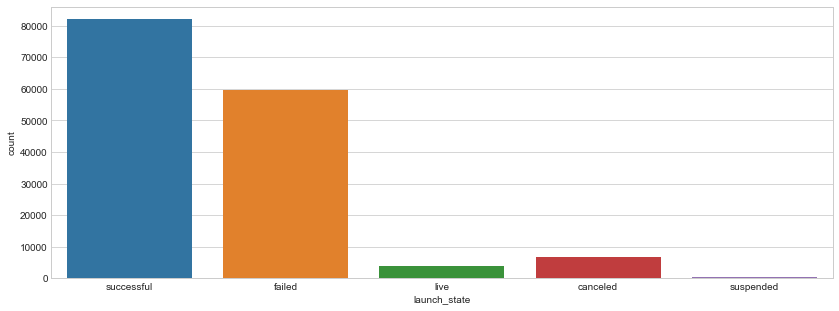

In [155]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [156]:
df['launch_state'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

Let's delete projects with launch state of canceled, live, or suspended.
* The number of canceled, live, and suspended is far less than failed and successful
* Live projects are not finished and so cannot be used as data to predict success or failure
* It is unknown why projects were canceled or suspended or whether or not they were eventually re-launched or unsuspended.

In [157]:
df.query("launch_state == 'failed' | launch_state == 'successful'", inplace=True)

In [158]:
df.reset_index(drop=True, inplace=True)

In [159]:
df['launch_state'].unique()

array(['successful', 'failed'], dtype=object)

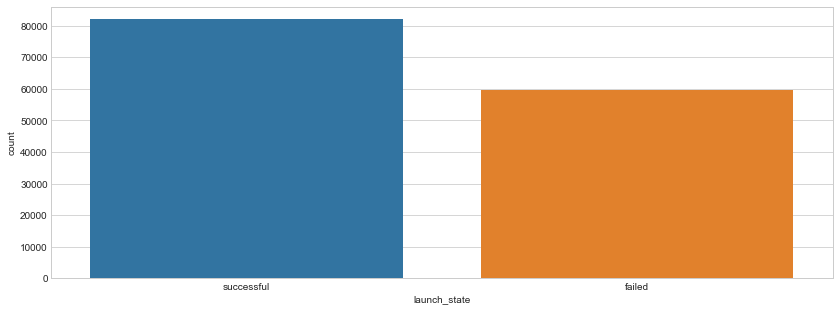

In [160]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [161]:
df['disable_communication'].unique()

array([False])

In [162]:
df['staff_pick'].unique()

array([ True, False])

In [163]:
df['spotlight'].unique()

array([ True, False])

In [164]:
df['creator_registered'].unique()

array([ True])

In [165]:
df.drop(columns=['disable_communication', 'creator_registered'], inplace=True)

In [166]:
df.shape

(141447, 12)

In [ ]:
# ---- CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES ----

In [167]:
category = pd.get_dummies(df['category'], drop_first=True)

In [168]:
category.head()

,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [169]:
country = pd.get_dummies(df['country'], drop_first=True)

In [170]:
country.head()

,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
d_launch_state = dict(zip(['failed','successful'], range(0,2)))

In [172]:
d_launch_state

{'failed': 0, 'successful': 1}

In [173]:
launch_state = df['launch_state'].map(d_launch_state)

In [174]:
df[df['launch_state'] == 'successful'].shape[0] - launch_state.sum() # Check mapping

0

In [175]:
# Drop the categorical launch_state column (keep 'category' and 'country' for visualization)

In [176]:
df.drop(['launch_state'],axis=1,inplace=True)

In [177]:
df.head()

,id,category,goal,backers_count,pledged,country,deadline,created_at,launched_at,staff_pick,spotlight
0,178634548,games,8000.0,241,8049.69,AU,2014-07-03 20:33:51,2013-11-04 00:08:57,2014-06-03 20:33:51,True,True
1,205566306,food,3000000.0,0,0.00,IN,2015-05-28 23:13:27,2015-04-11 10:25:48,2015-04-13 23:13:27,False,False
2,2046843379,games,1000.0,62,1900.00,US,2013-09-22 04:20:50,2013-06-10 20:30:46,2013-08-23 04:20:50,False,True
3,756644238,publishing,8000.0,75,8135.00,US,2012-05-18 00:44:06,2012-04-11 20:15:32,2012-04-18 00:44:06,False,True
4,714374402,theater,85000.0,61,87800.00,MX,2017-09-09 03:05:36,2017-07-06 03:08:31,2017-07-11 03:05:36,False,True


In [178]:
df.columns

Index(['id', 'category', 'goal', 'backers_count', 'pledged', 'country',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight'],
      dtype='object')

In [179]:
# Add the new dummy variable launch_state column and move it to column index 1 and country to column index 3
df = pd.concat([launch_state, df], axis=1)
df = df[['launch_state', 'id', 'category', 'country', 'goal', 'backers_count', 'pledged',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight']]

In [180]:
df.head()

,launch_state,id,category,country,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight
0,1,178634548,games,AU,8000.0,241,8049.69,2014-07-03 20:33:51,2013-11-04 00:08:57,2014-06-03 20:33:51,True,True
1,0,205566306,food,IN,3000000.0,0,0.00,2015-05-28 23:13:27,2015-04-11 10:25:48,2015-04-13 23:13:27,False,False
2,1,2046843379,games,US,1000.0,62,1900.00,2013-09-22 04:20:50,2013-06-10 20:30:46,2013-08-23 04:20:50,False,True
3,1,756644238,publishing,US,8000.0,75,8135.00,2012-05-18 00:44:06,2012-04-11 20:15:32,2012-04-18 00:44:06,False,True
4,1,714374402,theater,MX,85000.0,61,87800.00,2017-09-09 03:05:36,2017-07-06 03:08:31,2017-07-11 03:05:36,False,True


In [ ]:
# Add the dummy variable country and category variables

In [181]:
df = pd.concat([df, category, country], axis=1)

In [182]:
df.columns[0:13]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [183]:
df.isnull().sum().sum() # Check for nulls

0

In [184]:
df.shape

(141447, 214)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141447 entries, 0 to 141446
Columns: 214 entries, launch_state to ZW
dtypes: bool(2), datetime64[ns](3), float64(2), int64(3), object(2), uint8(202)
memory usage: 38.3+ MB


Now we need to consider what exactly some of those columns mean:
* id - still just a primary key
* pledged - somewhat useless except as a comparison to the goal. Drop pledged but add a pledged_ratio column (pledged/goal)
* goal - keep for now but we might drop later due to the potentially high variance with pledged
* deadline - useless except in comparison to launched_at. Drop deadline but add funding_days.
* created_at - useless; launched_at is more applicable.
* launched_at - keep to maybe create some time series plots; move before funding_days
* staff_pick - not exactly sure but convert to 0 (false) and 1 (true)
* spotlight - not exactly sure but covert to 0 (false) and 1 (true)

In [186]:
df.isnull().sum().sum()

0

In [187]:
df.isna().sum().sum()

0

In [188]:
df.columns[0:13]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [189]:
pledged_ratio = df['pledged'] / df['goal']

In [190]:
pledged_ratio.head()

0    1.006211
1    0.000000
2    1.900000
3    1.016875
4    1.032941
dtype: float64

In [191]:
df[['pledged', 'goal']].head()

,pledged,goal
0,8049.69,8000.0
1,0.00,3000000.0
2,1900.00,1000.0
3,8135.00,8000.0
4,87800.00,85000.0


In [192]:
df.columns

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=214)

In [193]:
df.columns.get_loc("pledged")

6

In [194]:
df.insert(loc=df.columns.get_loc("pledged"), column='pledged_ratio', value=pledged_ratio)

In [195]:
df.shape

(141447, 215)

In [196]:
df.columns

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'pledged', 'deadline', 'created_at',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=215)

In [197]:
df.drop(columns='pledged', inplace=True)

In [198]:
df.shape

(141447, 214)

In [199]:
df.columns[0:13]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [200]:
df['deadline'][0]

Timestamp('2014-07-03 20:33:51')

In [201]:
df['launched_at'][0]

Timestamp('2014-06-03 20:33:51')

In [202]:
df['deadline'][0] - df['launched_at'][0]

Timedelta('30 days 00:00:00')

In [203]:
(df['deadline'][0] - df['launched_at'][0]).days

30

In [204]:
(df['deadline'] - df['launched_at']).head()

0   30 days
1   45 days
2   30 days
3   30 days
4   60 days
dtype: timedelta64[ns]

In [205]:
(df['deadline'] - df['launched_at']).dt.days.head()

0    30
1    45
2    30
3    30
4    60
dtype: int64

In [206]:
funding_days = (df['deadline'] - df['launched_at']).dt.days

In [207]:
df.insert(loc=df.columns.get_loc("deadline"), column='funding_days', value=funding_days)

In [208]:
df.drop(columns='deadline', inplace=True)

In [209]:
df.shape

(141447, 214)

In [210]:
df.head()

,launch_state,id,category,country,goal,backers_count,pledged_ratio,funding_days,created_at,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,games,AU,8000.0,241,1.006211,30,2013-11-04 00:08:57,2014-06-03 20:33:51,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,205566306,food,IN,3000000.0,0,0.000000,45,2015-04-11 10:25:48,2015-04-13 23:13:27,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2046843379,games,US,1000.0,62,1.900000,30,2013-06-10 20:30:46,2013-08-23 04:20:50,False,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,756644238,publishing,US,8000.0,75,1.016875,30,2012-04-11 20:15:32,2012-04-18 00:44:06,False,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,714374402,theater,MX,85000.0,61,1.032941,60,2017-07-06 03:08:31,2017-07-11 03:05:36,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
df.drop(columns='created_at', inplace=True)

In [212]:
df.head(1)

,launch_state,id,category,country,goal,backers_count,pledged_ratio,funding_days,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,games,AU,8000.0,241,1.006211,30,2014-06-03 20:33:51,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
df.columns[0:12]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'funding_days', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [214]:
launched_at = df['launched_at']

In [215]:
launched_at

0        2014-06-03 20:33:51
1        2015-04-13 23:13:27
2        2013-08-23 04:20:50
3        2012-04-18 00:44:06
4        2017-07-11 03:05:36
5        2013-06-25 21:15:05
6        2011-07-08 23:58:56
7        2018-09-05 16:57:46
8        2017-01-17 21:24:02
9        2014-11-03 21:53:52
10       2015-05-29 17:07:10
11       2012-10-19 00:35:08
12       2012-02-16 17:35:53
13       2017-04-27 21:28:47
14       2012-06-14 05:02:09
15       2013-10-25 18:17:04
16       2013-04-03 06:33:37
17       2014-03-21 22:47:51
18       2015-01-30 00:17:19
19       2013-05-17 21:37:29
20       2017-01-06 01:25:15
21       2016-08-16 01:59:43
22       2014-07-16 19:28:52
23       2015-03-22 20:01:56
24       2010-12-08 18:12:04
25       2010-07-06 15:06:09
26       2012-04-30 21:26:32
27       2014-07-17 19:59:20
28       2016-09-07 20:23:51
29       2017-03-06 14:24:45
                 ...        
141417   2016-02-23 13:31:07
141418   2017-02-08 19:29:29
141419   2015-03-03 00:34:37
141420   2014-

In [216]:
df.drop(columns='launched_at', inplace=True)

In [217]:
df.head(1)

,launch_state,id,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,games,AU,8000.0,241,1.006211,30,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [218]:
df.insert(loc=2, column='launched_at', value=launched_at)

In [219]:
df.head(1)

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,2014-06-03 20:33:51,games,AU,8000.0,241,1.006211,30,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141447 entries, 0 to 141446
Columns: 213 entries, launch_state to ZW
dtypes: bool(2), datetime64[ns](1), float64(2), int64(4), object(2), uint8(202)
memory usage: 37.2+ MB


In [223]:
df.columns[0:12]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [224]:
df.head()

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,2014-06-03 20:33:51,games,AU,8000.0,241,1.006211,30,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,205566306,2015-04-13 23:13:27,food,IN,3000000.0,0,0.000000,45,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2046843379,2013-08-23 04:20:50,games,US,1000.0,62,1.900000,30,False,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,756644238,2012-04-18 00:44:06,publishing,US,8000.0,75,1.016875,30,False,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,714374402,2017-07-11 03:05:36,theater,MX,85000.0,61,1.032941,60,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [225]:
d_staff_pick = dict(zip([False,True], range(0,2)))
staff_pick = df['staff_pick'].map(d_staff_pick)
df[df['staff_pick'] == True].shape[0] - staff_pick.sum() # check mapping

0

In [226]:
d_spotlight = dict(zip([False,True], range(0,2)))
spotlight = df['spotlight'].map(d_spotlight)
df[df['spotlight'] == True].shape[0] - spotlight.sum() # check mapping

0

In [227]:
df.drop(['staff_pick','spotlight'],axis=1,inplace=True)

In [228]:
df.head(1)

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,2014-06-03 20:33:51,games,AU,8000.0,241,1.006211,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
df.insert(loc=df.columns.get_loc("comics"), column='staff_pick', value=staff_pick)

In [230]:
df.insert(loc=df.columns.get_loc("comics"), column='spotlight', value=spotlight)

In [231]:
df.head()

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,BA,BB,BD,BE,BF,BG,BJ,BM,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CG,CH,CI,CK,CL,CM,CN,CO,CR,CU,CV,CW,CY,CZ,DE,DJ,DK,DM,DO,DZ,EC,EE,EG,ES,ET,FI,FJ,FM,FO,FR,GA,GB,GD,GE,GH,GL,GM,GN,GP,GQ,GR,GT,GU,GY,HK,HN,HR,HT,HU,ID,IE,IL,IN,IQ,IR,IS,IT,JM,JO,JP,KE,KG,KH,KN,KP,KR,KW,KZ,LA,LB,LC,LK,LR,LS,LT,LU,LV,LY,MA,MC,MD,ME,MG,MK,ML,MM,MN,MO,MR,MT,MV,MW,MX,MY,MZ,NA,NE,NG,NI,NL,NO,NP,NZ,PA,PE,PF,PG,PH,PK,PL,PN,PR,PS,PT,PY,QA,RO,RS,RU,RW,SA,SC,SD,SE,SG,SI,SJ,SK,SL,SN,SO,SR,SS,SV,SX,SY,SZ,TC,TH,TL,TN,TO,TR,TT,TW,TZ,UA,UG,US,UY,VC,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,1,178634548,2014-06-03 20:33:51,games,AU,8000.0,241,1.006211,30,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,205566306,2015-04-13 23:13:27,food,IN,3000000.0,0,0.000000,45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2046843379,2013-08-23 04:20:50,games,US,1000.0,62,1.900000,30,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,756644238,2012-04-18 00:44:06,publishing,US,8000.0,75,1.016875,30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,714374402,2017-07-11 03:05:36,theater,MX,85000.0,61,1.032941,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [232]:
df['staff_pick'].unique()

array([1, 0], dtype=int64)

In [233]:
df['spotlight'].unique()

array([1, 0], dtype=int64)

In [234]:
# Null value check
df.isnull().sum().sum()

0

In [235]:
df.isna().sum().sum()

0

In [ ]:
# ========================================
# SAVE CSV
# ========================================
# df.to_csv('data/df01.csv', sep=",")

In [1]:
df.shape

NameError: name 'df' is not defined